<a href="https://colab.research.google.com/github/black-code23/my_first_project/blob/main/taxifareseoul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [9]:
seoul = pd.read_csv('/content/SeoulBikeData.csv',encoding='unicode_escape')
seoul.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [10]:
seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [16]:
seoul.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [18]:
seoul.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [21]:
type(seoul)

pandas.core.frame.DataFrame

In [23]:
seoul.shape

(8760, 14)

In [25]:
seoul.isnull()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8756,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8757,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8758,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [26]:
seoul.isnull().sum()

,0
Date,0
Rented Bike Count,0
Hour,0
Temperature(°C),0
Humidity(%),0
Wind speed (m/s),0
Visibility (10m),0
Dew point temperature(°C),0
Solar Radiation (MJ/m2),0
Rainfall(mm),0


In [27]:
seoul['Rented Bike Count'].value_counts()

,count
Rented Bike Count,
0,295
122,19
223,19
262,19
165,18
...,...
2096,1
2440,1
1600,1


In [30]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
seoul['Date'] = labelencoder.fit_transform(seoul['Date'])
seoul['Seasons'] = labelencoder.fit_transform(seoul['Seasons'])
seoul['Holiday'] = labelencoder.fit_transform(seoul['Holiday'])
seoul['Functioning Day'] = labelencoder.fit_transform(seoul['Functioning Day'])
seoul.head()


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,11,253,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1
1,11,203,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,1
2,11,172,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,1
3,11,106,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1,1
4,11,77,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1,1


In [31]:
seoul.corr()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
Date,1.000000e+00,0.030506,2.083623e-16,0.022461,-0.024660,-0.037084,-0.099690,0.007795,-0.004143,-0.001126,0.103662,-1.745374e-02,3.362455e-03,0.069037
Rented Bike Count,3.050560e-02,1.000000,4.147869e-01,0.555385,-0.207247,0.119617,0.202711,0.391113,0.285987,-0.130844,-0.149476,-2.698798e-01,7.462875e-02,0.218214
Hour,2.083623e-16,0.414787,1.000000e+00,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516,-1.747965e-15,1.289087e-16,0.005439
Temperature(°C),2.246102e-02,0.555385,1.241145e-01,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405,-3.352067e-01,5.593084e-02,-0.050170
Humidity(%),-2.466004e-02,-0.207247,-2.416438e-01,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183,-1.203104e-01,5.027765e-02,-0.020800
Wind speed (m/s),-3.708437e-02,0.119617,2.851967e-01,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554,1.089520e-01,-2.301677e-02,0.005037
Visibility (10m),-9.969013e-02,0.202711,9.875348e-02,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695,-1.477622e-02,-3.177281e-02,-0.026000
Dew point temperature(°C),7.794798e-03,0.391113,3.054372e-03,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887,-3.290270e-01,6.675910e-02,-0.052837
Solar Radiation (MJ/m2),-4.143462e-03,0.285987,1.451309e-01,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301,-7.581168e-02,5.077255e-03,-0.007665
Rainfall(mm),-1.125933e-03,-0.130844,8.714642e-03,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500,-1.929617e-02,1.426911e-02,0.002055


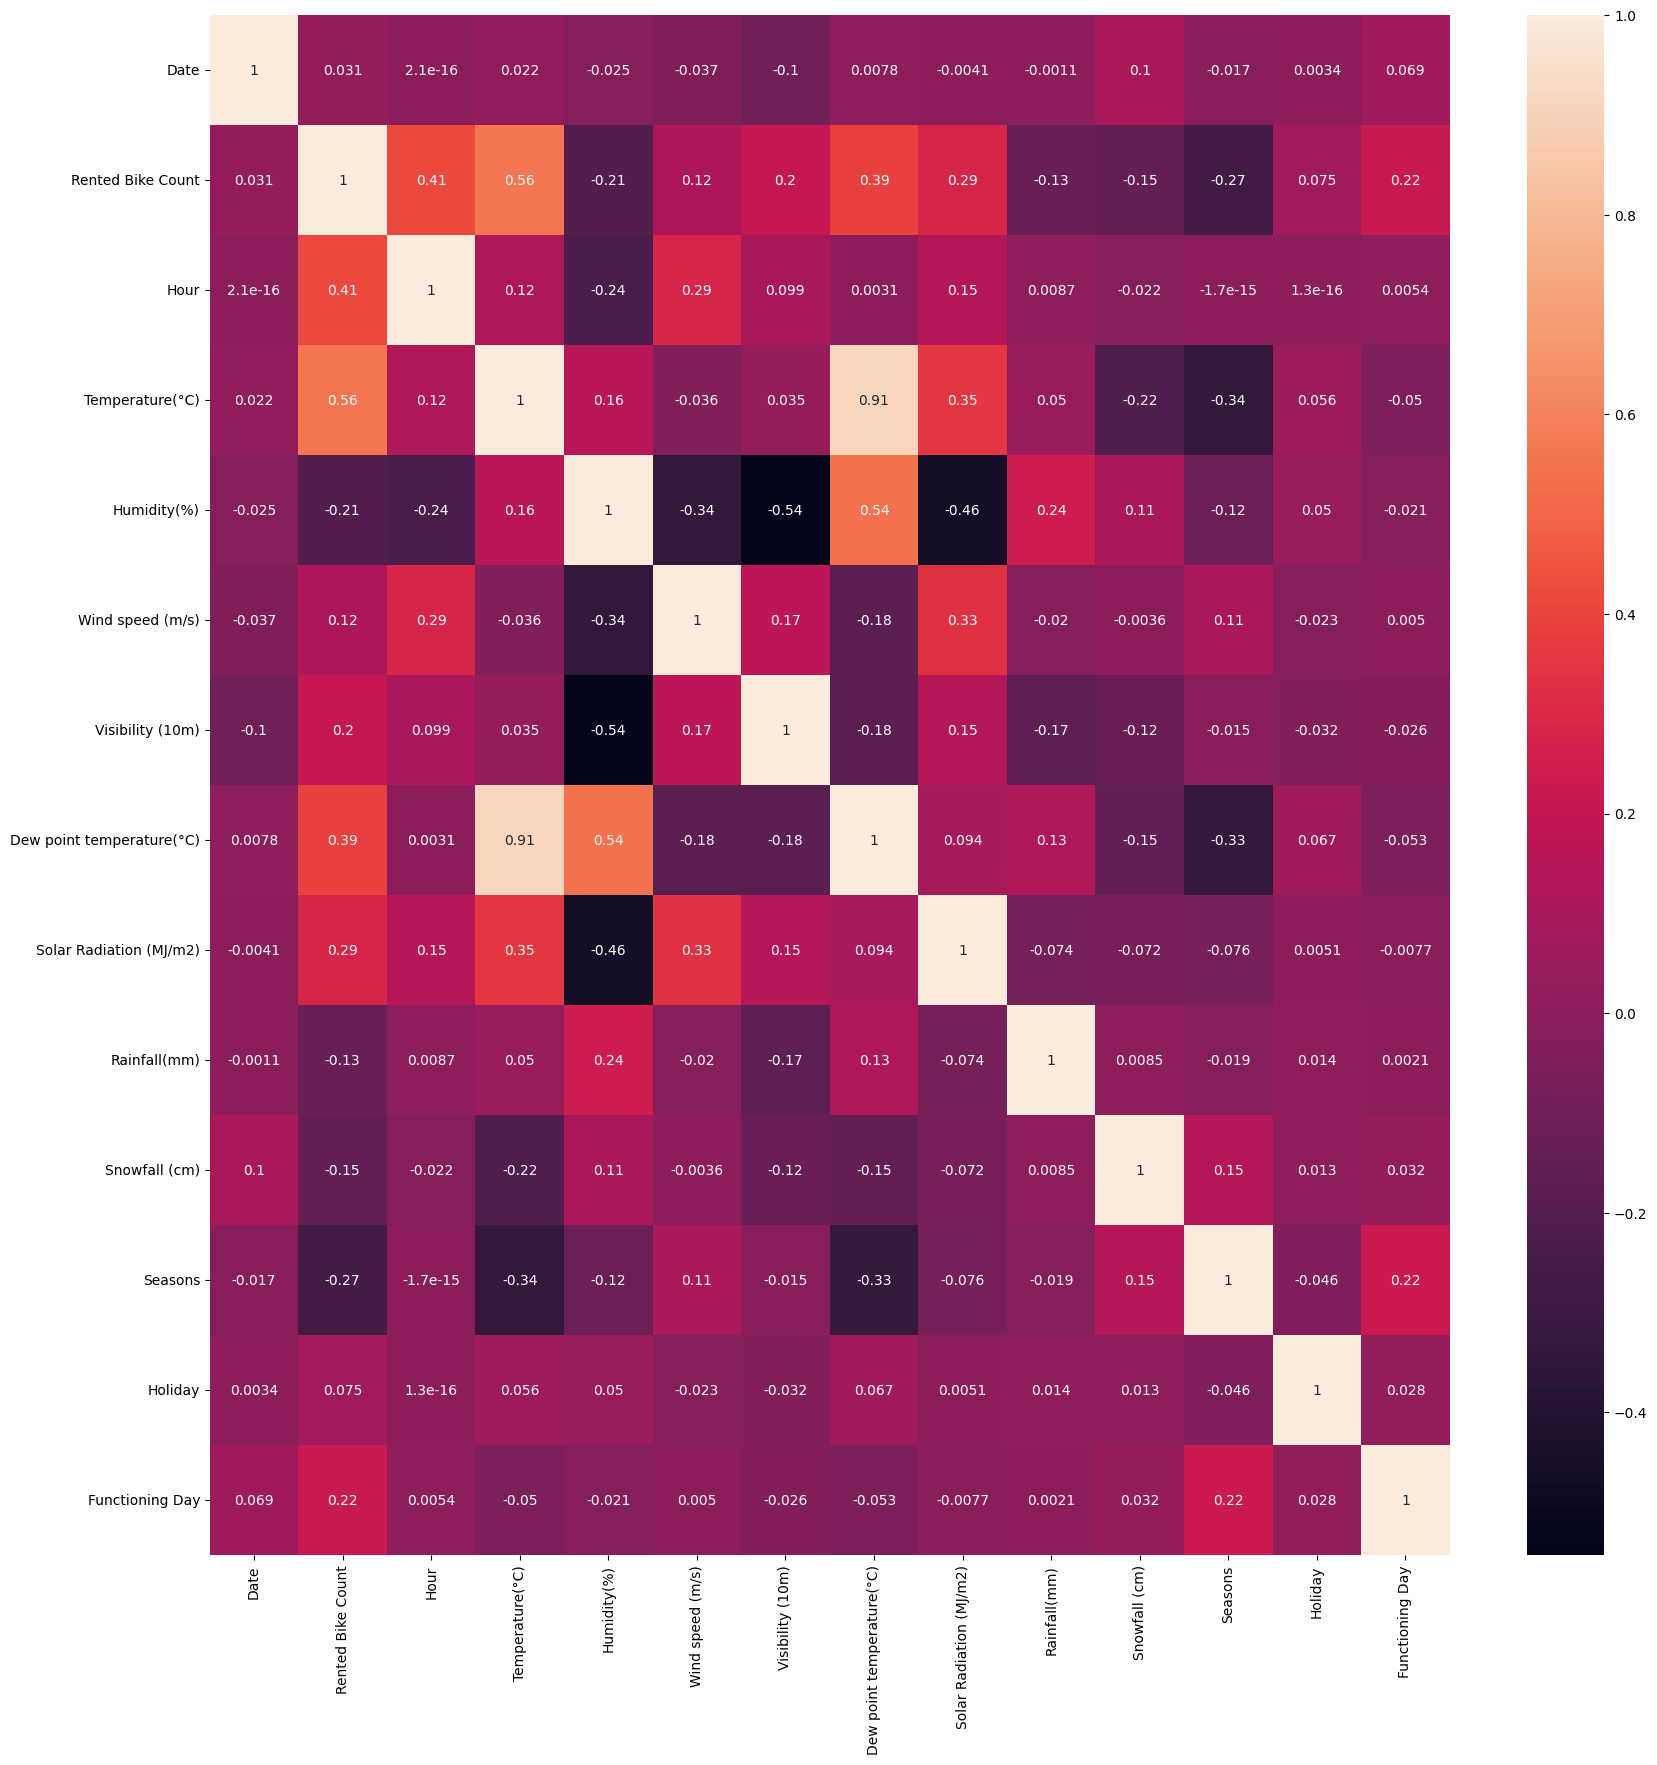

In [33]:
plt.figure(figsize = (20,20))
sns.heatmap(seoul.corr(),annot = True)
plt.savefig('seoulbike.jpg')

In [43]:
x = seoul.iloc[:,2:15]
x1 = seoul.iloc[:,0]
x['new_column'] = x1
y = seoul.iloc[:,1]

# from hereon at first splitting of data will take place annd then model training and model test will take place

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 236)

# now we will do scaling

In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


after doing the scaling ,we are going to do it using all five predictive **models**

In [51]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [62]:
y_pred = lr.predict(x_test)
print(y_pred)
print()
print(mean_squared_error(y_pred,y_test))

[ 590.54474885 -168.01184605  261.48211837 ... 1173.83232603  224.2357484
 1044.42594192]

131330.55141716587


In [63]:
import pickle
pickle.dump(lr,open('seoulride.pkl','wb'))
pickle.load(open('seoulride.pkl','rb'))

LinearRegression()